In [22]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from datetime import datetime, timedelta
from fetch_process_function import fetch_and_save_erc20_transfers, process_transactions, calculate_pnl, process_and_save_address

# ADDRESS = "0x5be9a4959308A0D0c7bC0870E319314d8D957dBB"
ADDRESS2 = "0x2c89a2ee92b9870f55989b4132a58c0e85222d86"
ADDRESS3 = "0x6c2a355929ee1262305e385ad49b84fe5f5a4777"

# OUTPUT_FILE = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/result"
OUTPUT_FILE2 = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2"
OUTPUT_FILE3 = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3"

# OUTPUT_FILE2 = "C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address2"
# OUTPUT_FILE3 = "C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/address3"

API_KEY = "VQAIR728IM4Z8RZKPYBR4ESM5I3WBZK2C1"
BASE_TOKENS = {"USDT", "USDC", "USDE", "DAI"}
base_pattern = re.compile('|'.join(BASE_TOKENS))

In [23]:
START_DATE = datetime(2024, 4, 25, 8, 0)  # 开始时间
END_DATE = datetime(2025, 1, 17, 8, 0)    # 结束时间
BATCH_DAYS = 60  # 每个批次的天数

def fetch_data_in_batches(address, output_file, start_date, end_date, batch_days):
    """
    分批次获取数据并保存。
    :param address: 钱包地址。
    :param output_file: 输出文件路径。
    :param start_date: 开始时间。
    :param end_date: 结束时间。
    :param batch_days: 每个批次的天数。
    :return: 合并后的 DataFrame。
    """
    current_start = start_date
    all_transfers = []

    while current_start < end_date:
        current_end = min(current_start + timedelta(days=batch_days), end_date)

        # 获取当前批次的数据
        print(f"Fetching data for {address} from {current_start} to {current_end}...")
        fetch_and_save_erc20_transfers(
            address=address,
            start_date=current_start.strftime('%Y-%m-%d %H:%M'),
            end_date=current_end.strftime('%Y-%m-%d %H:%M'),
            output_file=output_file,
            offset=1000,
        )

        transfers_df = pd.read_csv(output_file + "/erc20_transfers.csv")
        all_transfers.append(transfers_df)

        # 更新当前批次的开始时间
        current_start = current_end

    # 合并所有批次的数据
    combined_transfers = pd.concat(all_transfers, ignore_index=True)
    return combined_transfers

# 分批次获取 ADDRESS2 的数据
transfers_df2 = fetch_data_in_batches(ADDRESS2, OUTPUT_FILE2, START_DATE, END_DATE, BATCH_DAYS)
record_df_1_2, _, _ = process_transactions(transfers_df2, OUTPUT_FILE2, ADDRESS2, base_pattern)

# 分批次获取 ADDRESS3 的数据
transfers_df3 = fetch_data_in_batches(ADDRESS3, OUTPUT_FILE3, START_DATE, END_DATE, BATCH_DAYS)
record_df_1_3, _, _ = process_transactions(transfers_df3, OUTPUT_FILE3, ADDRESS3, base_pattern)

# 合并两个地址的数据
combined_record_df = pd.concat([record_df_1_2, record_df_1_3], ignore_index=True)

Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-04-25 08:00:00 to 2024-06-24 08:00:00...


2025-02-04 16:39:19,922 - INFO - Start block: 19728664, End block: 20157826
2025-02-04 16:39:19,922 - INFO - Fetching ERC20 transfers from block 19728664 to 20157826...
2025-02-04 16:39:20,800 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-04 16:39:20,801 - INFO - Final dataset contains 0 unique transactions.
2025-02-04 16:39:20,801 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-04 16:39:20,802 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-06-24 08:00:00 to 2024-08-23 08:00:00...


2025-02-04 16:39:22,548 - INFO - Start block: 20157825, End block: 20587589
2025-02-04 16:39:22,549 - INFO - Fetching ERC20 transfers from block 20157825 to 20587589...
2025-02-04 16:39:23,411 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-04 16:39:23,411 - INFO - Final dataset contains 0 unique transactions.
2025-02-04 16:39:23,411 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-04 16:39:23,411 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-08-23 08:00:00 to 2024-10-22 08:00:00...


2025-02-04 16:39:25,167 - INFO - Start block: 20587588, End block: 21017402
2025-02-04 16:39:25,168 - INFO - Fetching ERC20 transfers from block 20587588 to 21017402...
2025-02-04 16:39:26,076 - INFO - Page 1: Retrieved 61 transactions.
2025-02-04 16:39:26,951 - WARNING - API request failed on page 2: Request failed: No transactions found
2025-02-04 16:39:26,953 - INFO - Final dataset contains 61 unique transactions.
2025-02-04 16:39:26,959 - INFO - Data successfully saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2\erc20_transfers.csv
2025-02-04 16:39:26,959 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-10-22 08:00:00 to 2024-12-21 08:00:00...


2025-02-04 16:39:28,697 - INFO - Start block: 21017401, End block: 21447176
2025-02-04 16:39:28,697 - INFO - Fetching ERC20 transfers from block 21017401 to 21447176...
2025-02-04 16:39:30,084 - INFO - Page 1: Retrieved 975 transactions.
2025-02-04 16:39:30,955 - WARNING - API request failed on page 2: Request failed: No transactions found
2025-02-04 16:39:30,958 - INFO - Final dataset contains 975 unique transactions.
2025-02-04 16:39:30,978 - INFO - Data successfully saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2\erc20_transfers.csv
2025-02-04 16:39:30,979 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2


Fetching data for 0x2c89a2ee92b9870f55989b4132a58c0e85222d86 from 2024-12-21 08:00:00 to 2025-01-17 08:00:00...


2025-02-04 16:39:32,717 - INFO - Start block: 21447175, End block: 21640492
2025-02-04 16:39:32,717 - INFO - Fetching ERC20 transfers from block 21447175 to 21640492...
2025-02-04 16:39:34,142 - INFO - Page 1: Retrieved 1000 transactions.
2025-02-04 16:39:35,019 - INFO - Page 2: Retrieved 127 transactions.
2025-02-04 16:39:35,903 - WARNING - API request failed on page 3: Request failed: No transactions found
2025-02-04 16:39:35,903 - INFO - Final dataset contains 1127 unique transactions.
2025-02-04 16:39:35,941 - INFO - Data successfully saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2\erc20_transfers.csv
2025-02-04 16:39:35,941 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address2


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-04-25 08:00:00 to 2024-06-24 08:00:00...


2025-02-04 16:39:39,746 - INFO - Start block: 19728664, End block: 20157826
2025-02-04 16:39:39,747 - INFO - Fetching ERC20 transfers from block 19728664 to 20157826...
2025-02-04 16:39:40,625 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-04 16:39:40,626 - INFO - Final dataset contains 0 unique transactions.
2025-02-04 16:39:40,626 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-04 16:39:40,626 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-06-24 08:00:00 to 2024-08-23 08:00:00...


2025-02-04 16:39:42,411 - INFO - Start block: 20157825, End block: 20587589
2025-02-04 16:39:42,412 - INFO - Fetching ERC20 transfers from block 20157825 to 20587589...
2025-02-04 16:39:43,289 - WARNING - API request failed on page 1: Request failed: No transactions found
2025-02-04 16:39:43,290 - INFO - Final dataset contains 0 unique transactions.
2025-02-04 16:39:43,291 - WARNING - No valid transfers to save. DataFrame is empty.
2025-02-04 16:39:43,291 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-08-23 08:00:00 to 2024-10-22 08:00:00...


2025-02-04 16:39:45,071 - INFO - Start block: 20587588, End block: 21017402
2025-02-04 16:39:45,072 - INFO - Fetching ERC20 transfers from block 20587588 to 21017402...
2025-02-04 16:39:45,949 - INFO - Page 1: Retrieved 75 transactions.
2025-02-04 16:39:46,829 - WARNING - API request failed on page 2: Request failed: No transactions found
2025-02-04 16:39:46,830 - INFO - Final dataset contains 75 unique transactions.
2025-02-04 16:39:46,837 - INFO - Data successfully saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3\erc20_transfers.csv
2025-02-04 16:39:46,838 - INFO - Transfers saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3


Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-10-22 08:00:00 to 2024-12-21 08:00:00...


2025-02-04 16:39:48,580 - INFO - Start block: 21017401, End block: 21447176
2025-02-04 16:39:48,580 - INFO - Fetching ERC20 transfers from block 21017401 to 21447176...
2025-02-04 16:39:49,981 - INFO - Page 1: Retrieved 1000 transactions.
2025-02-04 16:39:51,367 - INFO - Page 2: Retrieved 1000 transactions.
2025-02-04 16:39:52,752 - INFO - Page 3: Retrieved 1000 transactions.
2025-02-04 16:39:54,139 - INFO - Page 4: Retrieved 1000 transactions.
2025-02-04 16:39:55,559 - INFO - Page 5: Retrieved 1000 transactions.
2025-02-04 16:39:56,669 - INFO - Page 6: Retrieved 187 transactions.
2025-02-04 16:39:57,537 - WARNING - API request failed on page 7: Request failed: No transactions found
2025-02-04 16:39:57,537 - INFO - Final dataset contains 5187 unique transactions.
2025-02-04 16:39:57,630 - INFO - Data successfully saved to C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/address3\erc20_transfers.csv
2025-02-04 16:39:57,631 - INFO - Transfers saved to C:/Users/Yuw

Fetching data for 0x6c2a355929ee1262305e385ad49b84fe5f5a4777 from 2024-12-21 08:00:00 to 2025-01-17 08:00:00...


2025-02-04 16:39:59,394 - INFO - Start block: 21447175, End block: 21640492
2025-02-04 16:39:59,395 - INFO - Fetching ERC20 transfers from block 21447175 to 21640492...
2025-02-04 16:40:00,772 - INFO - Page 1: Retrieved 1000 transactions.
2025-02-04 16:40:02,158 - INFO - Page 2: Retrieved 1000 transactions.
2025-02-04 16:40:03,802 - INFO - Page 3: Retrieved 1000 transactions.
2025-02-04 16:40:05,178 - INFO - Page 4: Retrieved 1000 transactions.
2025-02-04 16:40:06,577 - INFO - Page 5: Retrieved 1000 transactions.
2025-02-04 16:40:07,991 - INFO - Page 6: Retrieved 1000 transactions.
2025-02-04 16:40:09,380 - INFO - Page 7: Retrieved 1000 transactions.
2025-02-04 16:40:10,771 - INFO - Page 8: Retrieved 1000 transactions.
2025-02-04 16:40:12,148 - INFO - Page 9: Retrieved 681 transactions.
2025-02-04 16:40:13,016 - WARNING - API request failed on page 10: Request failed: No transactions found
2025-02-04 16:40:13,036 - INFO - Final dataset contains 8681 unique transactions.
2025-02-04 16:4

In [24]:
import os

def process_pnl(record_df):
    if not record_df.empty:
        unique_tokens_count = record_df["token_symbol"].nunique()
        unique_tokens = record_df["token_symbol"].unique()
        results = []
        pnl_dfs = []  # 用于存储每个token的pnl_df
        # 在USDC USDE USDT DAI的价格默认为1：1的情况下，不考虑不同的稳定币作为单位的情况

        for token in unique_tokens:
            token_df = record_df[record_df["formatted_record"].str.contains(fr"\b{token}\b", regex=True)]
            unique_price_units = token_df["price_unit"].unique()
            price_units_str = ", ".join(unique_price_units)
            
            print(f"{token} (Price Units: {price_units_str}): {len(token_df)} records")

            pnl_df = calculate_pnl(token_df)
            print(tabulate(pnl_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))   
            total_pnl = pnl_df["pnl"].sum()

            pnl_dfs.append(pnl_df)  # 将每个token的pnl_df存储到列表中
            results.append({"token": token, "price_unit": price_units_str, "total_pnl": total_pnl})

        pnl_summary_df = pd.DataFrame(results)
        print(tabulate(pnl_summary_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))
        
        # 将结果保存为 CSV 文件
        save_dir = r"C:\Users\YuweiCao\Documents\GitHub\Project\Project\etherscan\pnl_result"
        file_name = f"pnl_summary.csv"
        full_path = os.path.join(save_dir, file_name)
        pnl_summary_df.to_csv(full_path, index=False)
        print("PNL summary saved to pnl_summary.csv")

        # 如果需要将每个 token 的 PNL 详情也保存为 CSV
        for token in unique_tokens:
            token_df = record_df[record_df["formatted_record"].str.contains(fr"\b{token}\b", regex=True)]
            pnl_df = calculate_pnl(token_df)
            file_name = f"pnl_details_{token}.csv"
            full_path = os.path.join(save_dir, file_name)
            pnl_df.to_csv(full_path, index=False)
            print(f"PNL details for {token} saved to pnl_details_{token}.csv")
    else:
        print("No transactions found")
    
# 计算pnl
def process_eth_pnl(record_df):
    if not record_df.empty:
        eth_record_df = record_df[record_df["token_symbol"].str.contains(r'ETH', regex=True, case=False)]
        
        if eth_record_df.empty:
            print("No ETH-related transactions found.")
            return pd.DataFrame()
        eth_pnl_df = calculate_pnl(eth_record_df).sort_values("timeStamp")
        print(tabulate(eth_pnl_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))
        # eth_pnl_df.to_csv("C:/Users/HUAWEI/Documents/GitHub/Project/etherscan/band_result/eth_pnl_details.csv", index=False)
        eth_pnl_df.to_csv("C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/band_result/eth_pnl_details.csv", index=False)
        return eth_pnl_df
    
    else:
        print("No transactions found")
        return pd.DataFrame()

combined_record_df = combined_record_df.sort_values("timeStamp")
# eth_record_df = process_eth_pnl(combined_record_df)
process_pnl(combined_record_df)

WETH (Price Units: USDT/WETH, aEthUSDT/WETH, DAI/WETH, aEthDAI/WETH): 1795 records
+---------------------+-------------+--------+----------+---------+------------+----------------+
| Date                |   timeStamp | Type   |   amount |   price |        pnl |   net_position |
+=====================+=============+========+==========+=========+============+================+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |   226.00 | 2654.89 |  146664.13 |         226.00 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |   629.40 | 2654.89 |  408459.60 |         855.40 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:11 |  1727622431 | BUY    |    74.58 | 2654.89 |   48399.16 |         929.98 |
+---------------------+-------------+--------+----------+---------+------------+----------------+
| 2024-09-29 15:07:23 |  1727622443

<Figure size 1200x600 with 0 Axes>

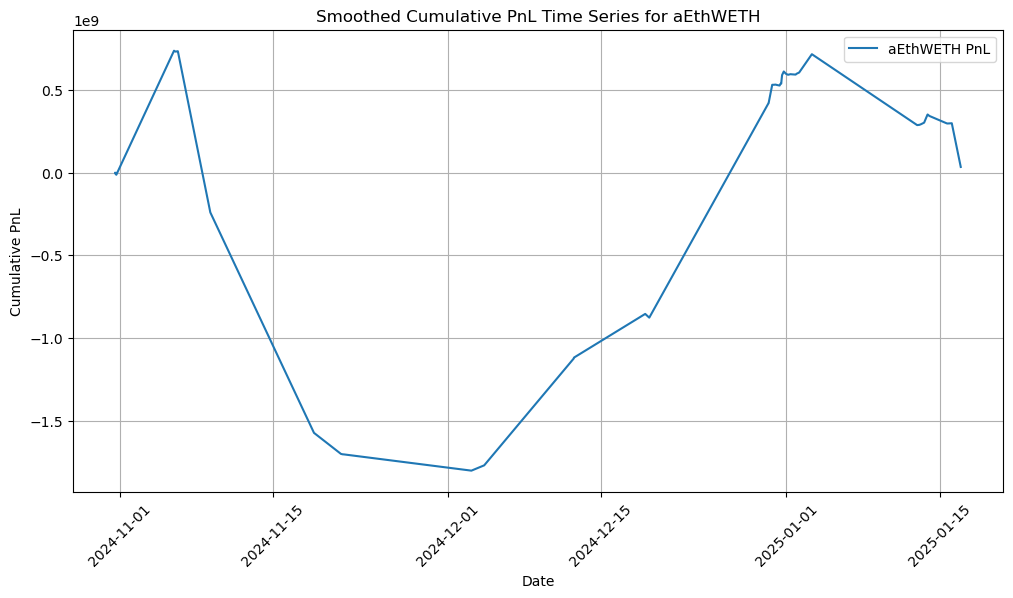

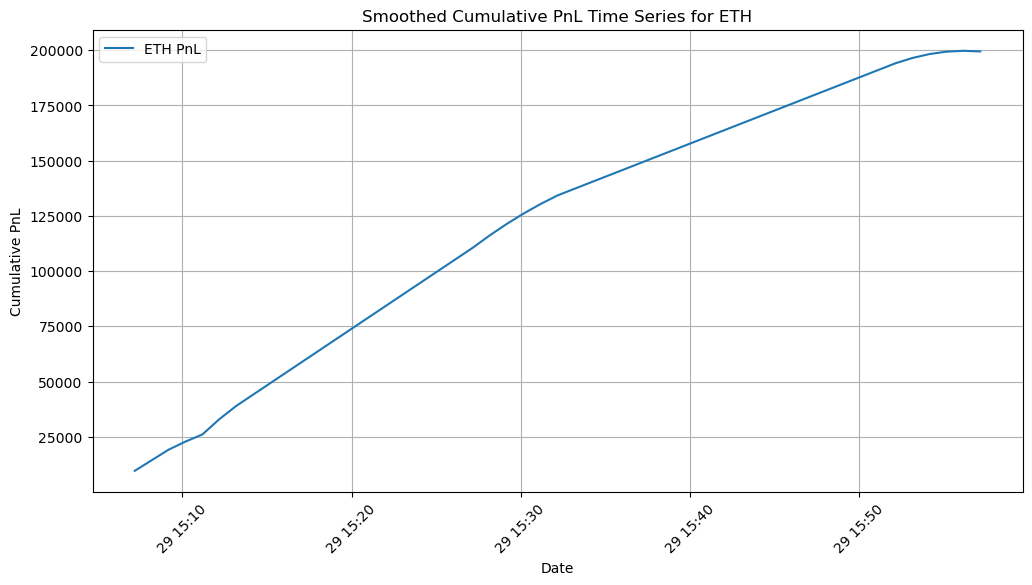

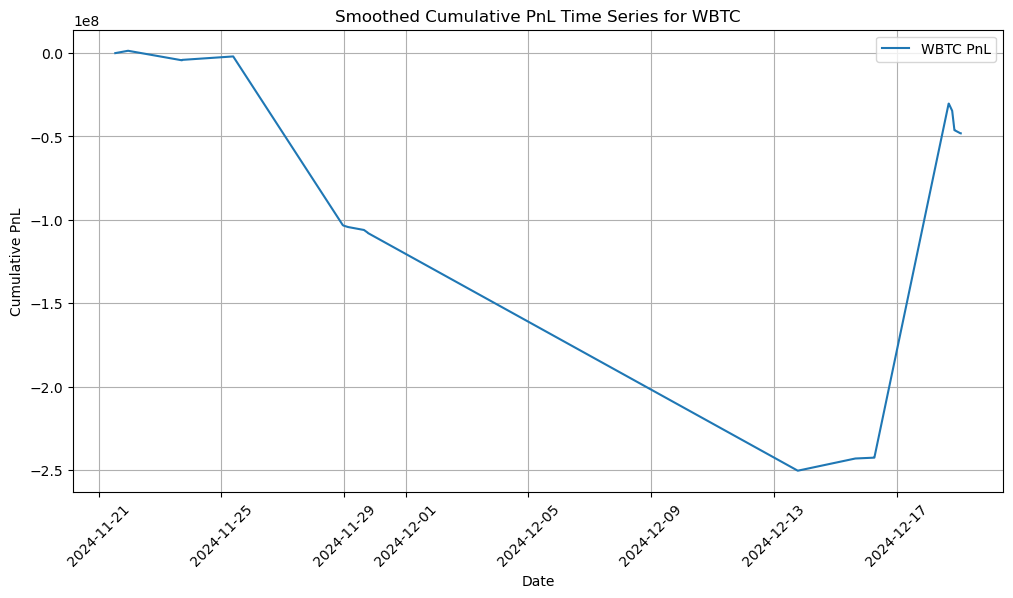

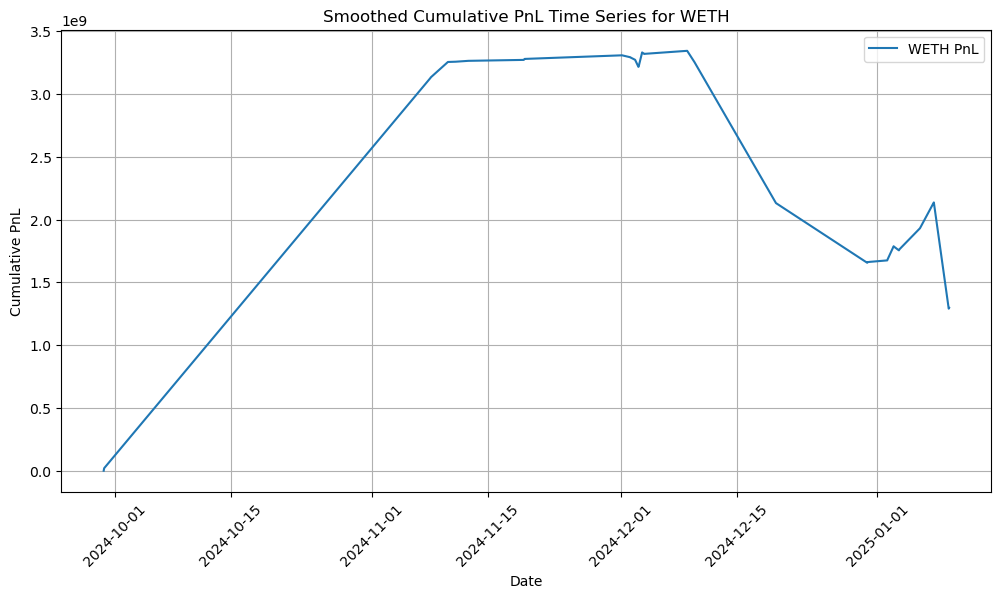

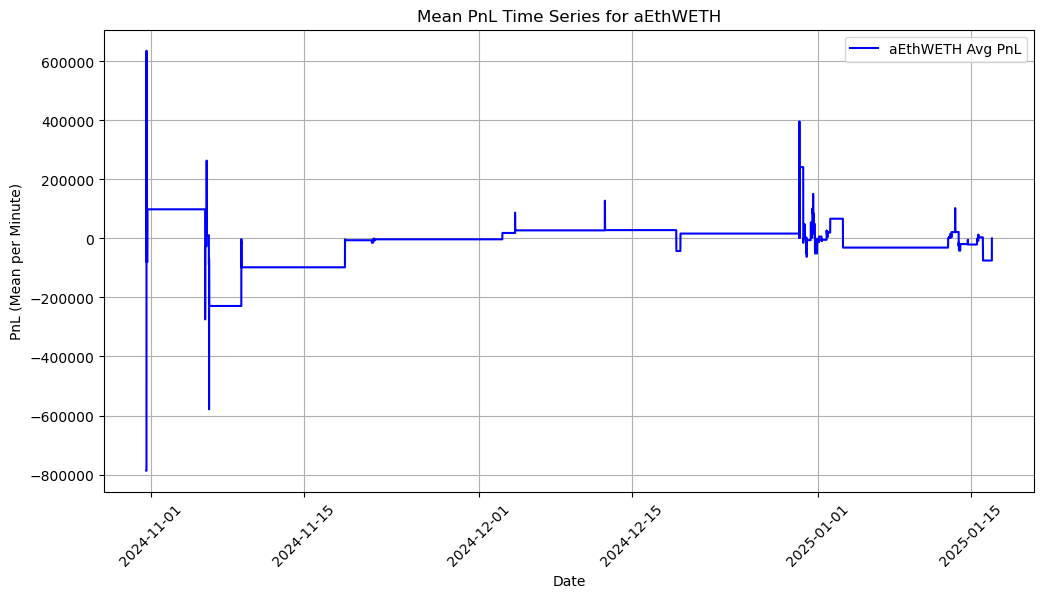

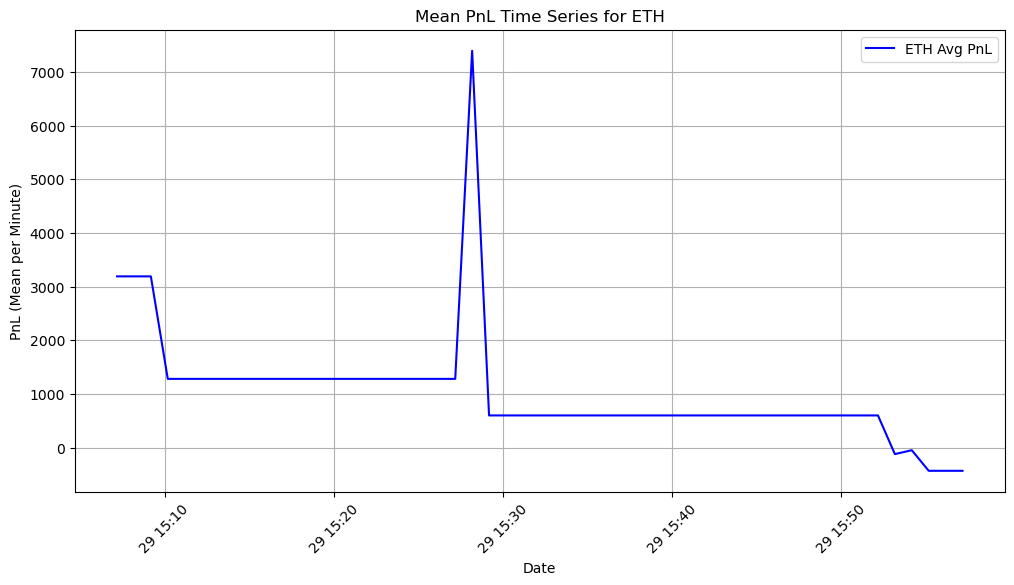

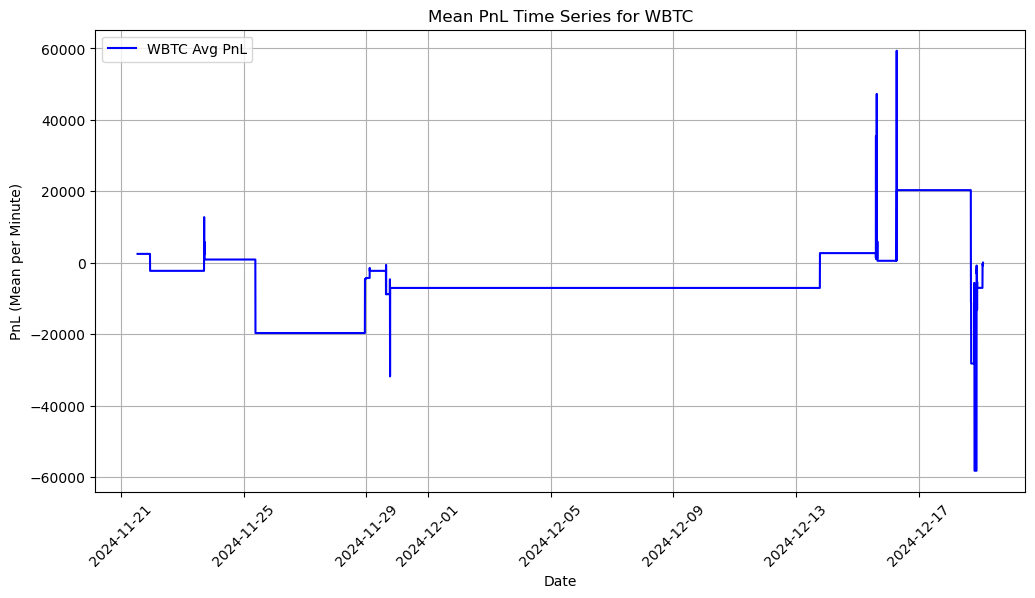

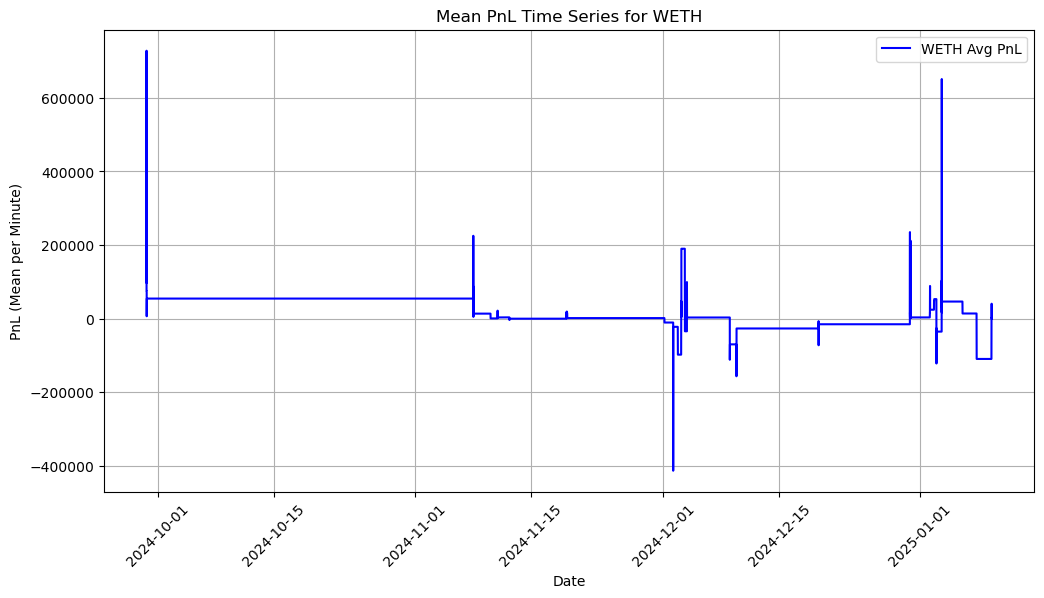

In [25]:
folder_path = "C:/Users/YuweiCao/Documents/GitHub/Project/Project/etherscan/pnl_result"

all_files = [f for f in os.listdir(folder_path) if f.startswith("pnl_details_") and f.endswith(".csv")]

dfs = {}

for filename in all_files:
    token = filename.replace("pnl_details_", "").replace(".csv", "")
    
    # aEthWETH_pnl / ETH_pnl / WETH_pnl ...
    dict_key = f"{token}_pnl"

    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)
    dfs[dict_key] = df
        
plt.figure(figsize=(12, 6))  # 统一画布
        
for name, df in dfs.items():
    if 'Date' in df.columns and 'pnl' in df.columns:
        token_for_label = name.replace('_pnl', '')
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

        df_grouped = df.groupby('Date').agg({'pnl': 'sum'}).reset_index()

        full_time_index = pd.date_range(start=df_grouped['Date'].min(), end=df_grouped['Date'].max(), freq='min')

        df_grouped = df_grouped.set_index('Date').reindex(full_time_index).ffill().reset_index()
        df_grouped.rename(columns={'index': 'Date'}, inplace=True)

        df_grouped['cumulative_pnl'] = df_grouped['pnl'].cumsum()

        df_grouped['smoothed_pnl'] = df_grouped['cumulative_pnl'].rolling(window=5, min_periods=1).mean()

        plt.figure(figsize=(12, 6))
        plt.plot(df_grouped['Date'], df_grouped['smoothed_pnl'], label=f"{token_for_label} PnL")

        plt.xlabel("Date")
        plt.ylabel("Cumulative PnL")
        plt.title(f"Smoothed Cumulative PnL Time Series for {token_for_label}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.show()
        
for name, df in dfs.items():
    if 'Date' in df.columns and 'pnl' in df.columns:
        token_for_label = name.replace('_pnl', '')

        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

        df_grouped = df.groupby('Date').agg({'pnl': 'mean'}).reset_index()

        full_time_index = pd.date_range(start=df_grouped['Date'].min(), 
                                        end=df_grouped['Date'].max(), 
                                        freq='min')

        df_grouped = df_grouped.set_index('Date').reindex(full_time_index).ffill().reset_index()
        df_grouped.rename(columns={'index': 'Date'}, inplace=True)

        plt.figure(figsize=(12, 6))
        plt.plot(df_grouped['Date'], df_grouped['pnl'], label=f"{token_for_label} Avg PnL", color='blue')

        plt.xlabel("Date")
        plt.ylabel("PnL (Mean per Minute)")
        plt.title(f"Mean PnL Time Series for {token_for_label}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.show()